In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import fmin_cg
import scipy.stats as st

%matplotlib inline

In [2]:
loc = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex8\ex8\ex8data1'
data1 = loadmat(loc)
data1_x = data1['X']
data1_xval = data1['Xval']
data1_yval = data1['yval']

In [3]:
data1_yval.shape

(307, 1)

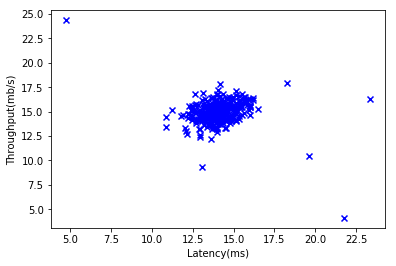

In [4]:
# visualize the data1_x
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot = ax.scatter(data1_x[:, 0], data1_x[:, 1], marker = 'x', c = 'b')
ylabel = ax.set_ylabel('Throughput(mb/s)')
xlabel = ax.set_xlabel('Latency(ms)')

In [5]:
def estimateGaussian(x):
    mu = x.mean(axis=0)
    sigma2 = x.std(axis=0, ddof=0) ** 2
    
    # use ddof=0 to keep it computed as 1/m
    # if want to use 1/(m-1), set ddof=1
    
    return mu, sigma2

In [239]:
mu, sigma2 = estimateGaussian(data1_x)
mu, sigma2

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [208]:
def multivariateGaussian(x, mu):
    m = x.shape[0]
    cov = np.cov(x.T)
    p = st.multivariate_normal.pdf(x, mean=mu, cov=cov)
    
    return p, cov

In [240]:
testP, testCov = multivariateGaussian(data1_x, mu)
testCov.shape

(2, 2)

In [241]:
mu_val = estimateGaussian(data1_xval)[0]
testPval = multivariateGaussian(data1_xval, mu)[0]

In [237]:
testPval.shape

(307,)

In [90]:
#testP

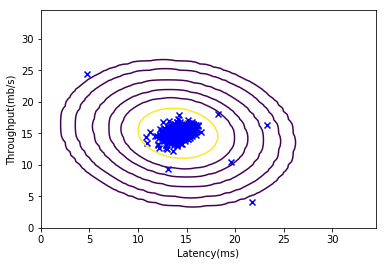

In [188]:
# visualize fit
x1v, x2v = np.mgrid[0:35:.5, 0:35:.5]
pos = np.dstack((x1v, x2v))
z = st.multivariate_normal.pdf(pos, mean=mu, cov=testCov)

fig = plt.figure()
ax = fig.add_subplot(111)
fit = ax.contour(x1v, x2v, z, levels=[10**(-18), 10**(-14), 10**(-10), 10**(-7), 10**(-5), 10**(-3)])

plot = ax.scatter(data1_x[:, 0], data1_x[:, 1], marker = 'x', c = 'b')
#fit = ax.contour(x1v, x2v, z)
ylabel = ax.set_ylabel('Throughput(mb/s)')
xlabel = ax.set_xlabel('Latency(ms)')

In [143]:
idx=data1_yval==1
idx.flatten().shape

(307,)

In [180]:
def selectThreshold(yval, pval):
    step = (max(pval) - min(pval))/1000
    eps_list = np.arange(min(pval), max(pval), step)
    epsilon = 0
    f1 = 0
    
    for eps in eps_list:
        pred = (pval < eps).astype(int)
        
        tp = sum((pred[(yval==1).flatten()]==1))
        fp = sum((pred[(yval==0).flatten()]==1))
        fn = sum((pred[(yval==1).flatten()]==0))
        
        if (tp + fp) != 0:
            precision = tp / (tp + fp)
        else: precision = 0
        
        recall = tp / (tp + fn)
        
        if (precision + recall) != 0:
            f1_i = 2 * precision * recall / (precision + recall)
        else: f1_i = 0
        
        if f1_i > f1:
            epsilon = eps
            f1 = f1_i

    return epsilon, f1

In [242]:
testEps, testf1 = selectThreshold(data1_yval, testPval)
testEps, testf1

(8.70322495519775e-05, 0.8750000000000001)

In [206]:
loc = r'C:\Users\c0w00f8.WMSC\Documents\Coursera\1. Machine Learning\machine-learning-ex8\ex8\ex8data2.mat'
data2 = loadmat(loc)
data2
data2_x = data2['X']
data2_xval = data2['Xval']
data2_yval = data2['yval']

In [207]:
data2_x.shape

(1000, 11)

In [252]:
def estGaussian(x):
    mu = x.mean(axis=0)
    #cov = np.cov(x.T)
    cov = x.std(axis=0, ddof=0) ** 2
    return mu, cov

In [246]:
def compPdf(x, mu, cov):
    p = st.multivariate_normal.pdf(x, mean=mu, cov=cov)
    return p

In [255]:
def anomalyDetect(x, xval, yval):
    
    # estimate mu and sigma2
    mu, cov = estGaussian(x)
    #print ('cov', cov)
    #mu_val, sigma2val = estimateGaussian(xval)
    
    # compute pdf
    pval = compPdf(xval, mu, cov)
    p = compPdf(x, mu, cov)
    
    # find threshold
    eps_opt, f1 = selectThreshold(yval, pval)
    
    # use eps_opt to find the anomalies
    pred = (p < eps_opt).astype(int)
    
    return pred, eps_opt

In [257]:
data2pred, data2eps = anomalyDetect(data2_x, data2_xval, data2_yval)
data2pred.sum()
#data2eps

117